In [365]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [357]:
reactions = ["Headache", "Vomiting", "Insomnia", "Somnolence", "Somnolence", "Dyspepsia", "Malaise", "Diarrhoea", "Swelling", "Dyspnoea"]
cols_seriousness = ["seriousnesscongenitalanomali",
                    "seriousnessdeath",
                    "seriousnessdisabling",
                    "seriousnesshospitalization",
                    "seriousnesslifethreatening",
                    "seriousnessother"]

In [358]:
def helper(lst, result, index):
    lst.append(result[index]['patient'])
    df_1 = pd.DataFrame(lst)
    df_1['reaction_count'] = df_1.apply(lambda a: len(a['reaction']), axis=1)
    df_1['drug_count'] = df_1.apply(lambda a: len(a['drug']), axis=1)
    df_1['seriousness'] = df_1.apply(lambda a: 1, axis=1)
    for serious in cols_seriousness:
        df_1[serious] = df_1.apply(lambda a: 0, axis=1)
        
    return df_1

In [359]:
df = pd.DataFrame()
for reaction in reactions:
    url = 'https://api.fda.gov/drug/event.json?search=patient.reaction.reactionmeddrapt:{}&limit=1000'.format(reaction)
    try:
        response = requests.get(url)
        if not response.status_code == 200:
            print("HTTP error",response.status_code)
        else:
            try:
                result = response.json()['results']
                lst_1 = list()
                for i in range(1,len(result)):
                    headache_df = helper(lst_1, result, i)
                for index, val in headache_df.iterrows():
                    if result[index]['serious'] == '2':
                        headache_df.loc[index,'seriousness'] = 2
                    for col in cols_seriousness:
                        if col in result[index]:
                            headache_df.loc[index,col] = 1
                headache_df['reaction'] = reaction
                df = pd.concat([df, headache_df])
            except:
                print("Response not in valid JSON format")
    except:
        print("Something went wrong with requests.get")    

In [361]:
df.to_csv('full_dataset.csv', index=False, encoding='utf-8')

D:\aaaaaaaa\lib\site-packages\dabl\plot\supervised.py:610: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  warnings.warn("The second positional argument of plot is a Series 'y'."
D:\aaaaaaaa\lib\site-packages\dabl\preprocessing.py:462: UserWarning: Index not unique, resetting index!
  warn("Index not unique, resetting index!", UserWarning)


Target looks like classification


D:\aaaaaaaa\lib\site-packages\dabl\plot\utils.py:678: UserWarning: Dropped 21 outliers in column reaction_count.
  warn("Dropped {} outliers in column {}.".format(
D:\aaaaaaaa\lib\site-packages\dabl\plot\utils.py:678: UserWarning: Dropped 26 outliers in column drug_count.
  warn("Dropped {} outliers in column {}.".format(
D:\aaaaaaaa\lib\site-packages\dabl\plot\utils.py:678: UserWarning: Dropped 7 outliers in column patientagegroup.
  warn("Dropped {} outliers in column {}.".format(
D:\aaaaaaaa\lib\site-packages\dabl\plot\utils.py:678: UserWarning: Dropped 19 outliers in column patientonsetage.
  warn("Dropped {} outliers in column {}.".format(


Linear Discriminant Analysis training set score: 0.546


[[<Figure size 1200x400 with 6 Axes>,
  <Figure size 1600x400 with 4 Axes>,
  <Figure size 1600x400 with 4 Axes>,
  <Figure size 640x480 with 1 Axes>],
 None]

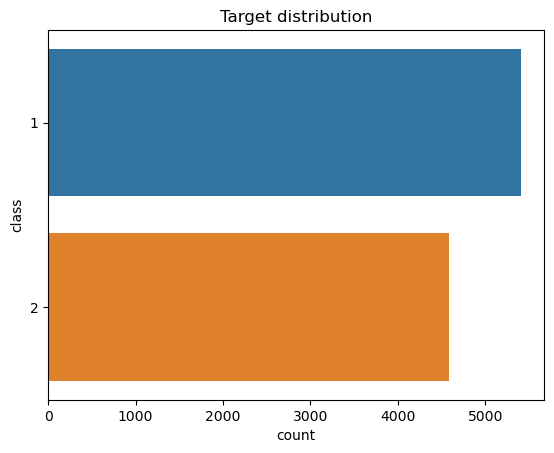

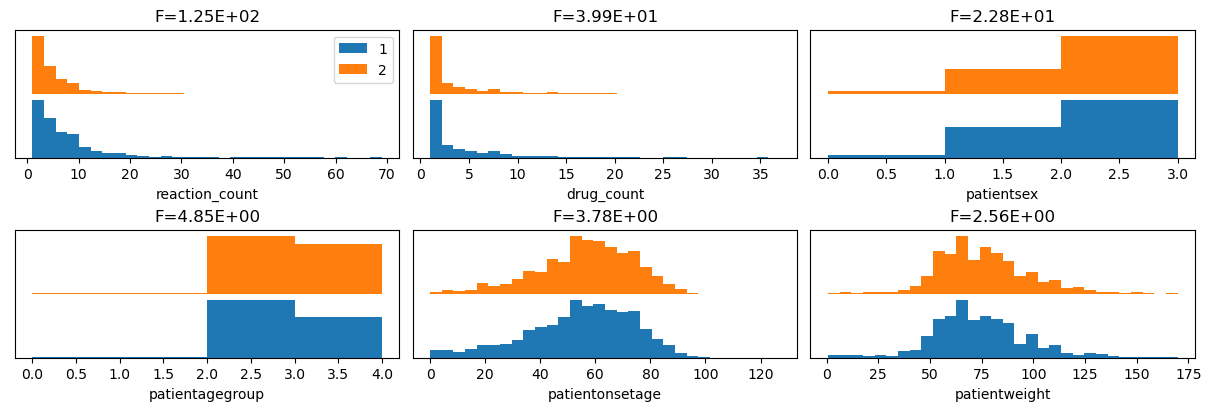

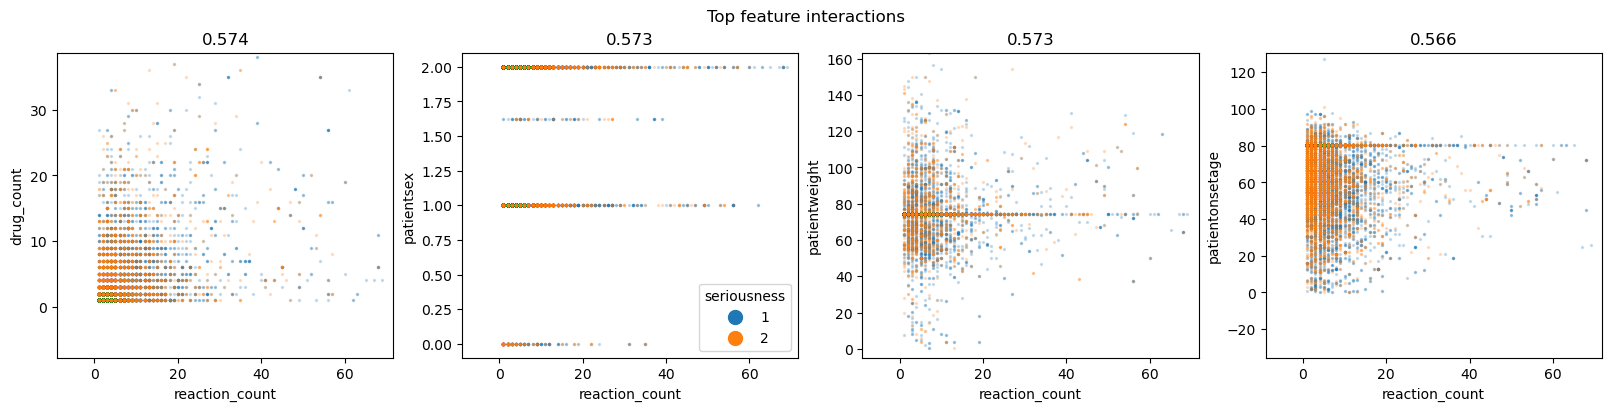

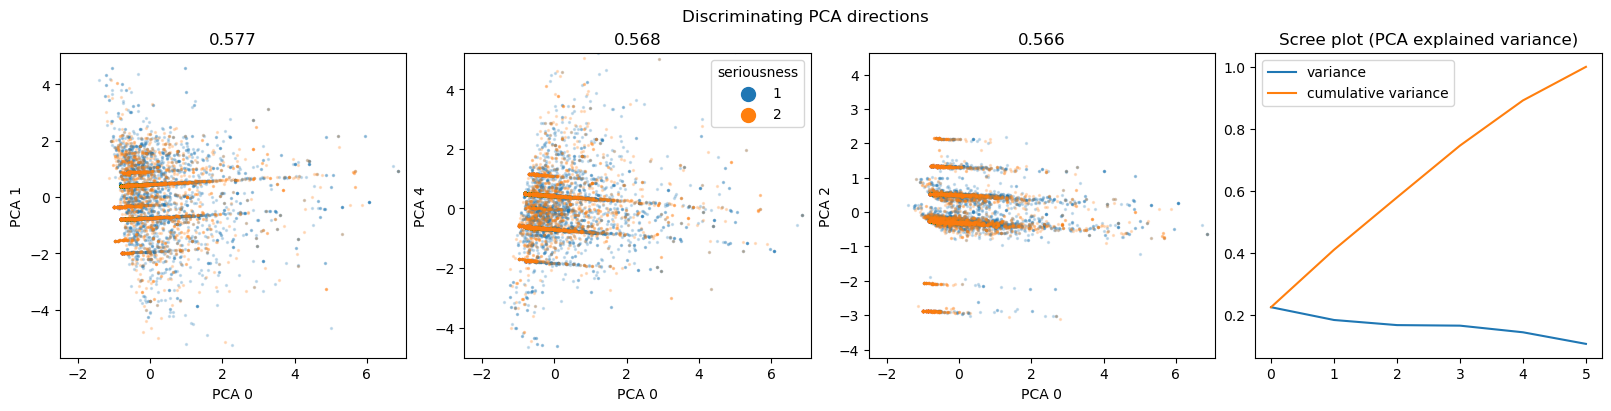

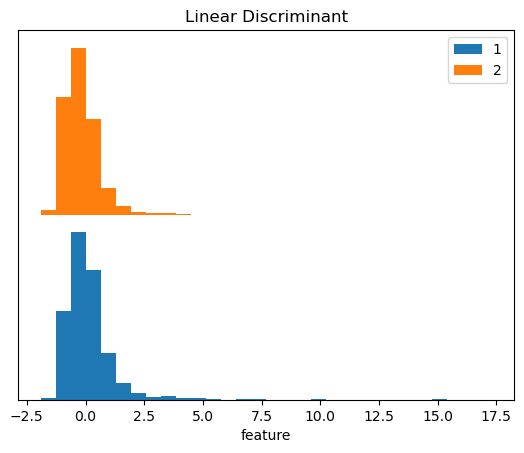

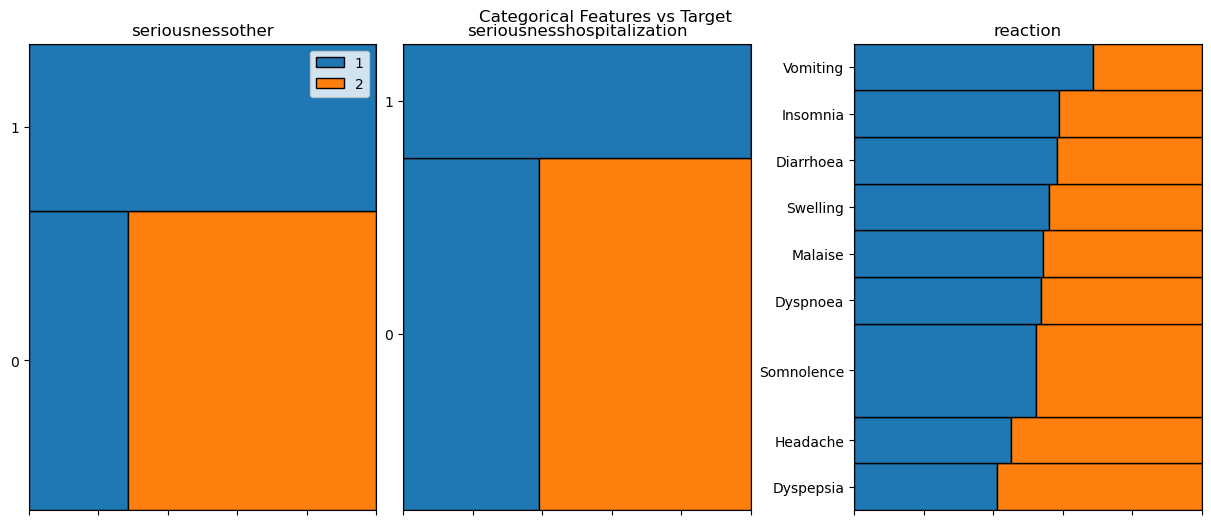

In [364]:
from dabl import plot

plot(df,"seriousness")

sns.heatmap(df.corr(),annot=True,cmap=)

In [371]:
corr = pd.DataFrame(df.corr())

In [372]:
corr.to_csv('correlation.csv', index=False)

### Count the most commonly mentioned drug

In [ ]:
drug_ch1 = {}
drug_ch2 = {}
drug_ch3 = {}


for line in df["drug"]:
    
    drug_name = line[0]['medicinalproduct'].split(" ")[0].replace(".", "")
    
    if line[0]['drugcharacterization'] == "1":
#         name_1 = line[0]['medicinalproduct'].split(" ")[0]
        if drug_name not in drug_ch1:
            drug_ch1[drug_name] = 1
        else:
            drug_ch1[drug_name] += 1
            
    elif line[0]['drugcharacterization'] == "2":
#         name_2 = line[0]['medicinalproduct'].split(" ")[0]
        if drug_name not in drug_ch2:
            drug_ch2[drug_name] = 1
        else:
            drug_ch2[drug_name] += 1
            
    else:
#         name_3 = line[0]['medicinalproduct'].split(" ")[0]
        if drug_name not in drug_ch3:
            drug_ch3[drug_name] = 1
        else:
            drug_ch3[drug_name] += 1
        
#     print(line[0]['drugcharacterization'], line[0]['medicinalproduct'])

In [ ]:
print(dict(sorted(drug_ch2.items(), key=lambda item: item[1], reverse = True))

In [ ]:
sum(drug_ch1.values())

### Try to find if there is a different distribution 

In [ ]:
df_1 = df[(df['drug'].astype("str").str.contains("TECFIDERA"))]

In [ ]:
plt.hist(df_1['patientonsetage'].fillna(0).astype(int))

In [ ]:
plt.hist(df[df['patientonsetage'].fillna(0).astype(int) <= 100]["patientonsetage"].fillna(0).astype(int)